In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/indian_liver_patient_cleaned.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
x = df.drop('Dataset', axis=1)
y = df['Dataset']

In [5]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### model selection

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, make_scorer, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

#### logistic regression

In [7]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7280701754385965
Precision: 0.75
Recall: 0.9259259259259259
F-1 score: 0.8287292817679557


In [8]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.719412756028001

In [43]:
lg = LogisticRegression()
hyperparameters = {'C': np.logspace(-4, 4, 20),
                   'penalty' : ['l1', 'l2']}

gslg = GridSearchCV(lg, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gslg = gslg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished


In [44]:
best_gslg.best_estimator_

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
model_lr = LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

model_lr.fit(X_train, y_train)

print('Logistic Regression Classifier:')
print('Accuracy:', model_lr.score(X_test, y_test))
print('Precision:', precision_score(y_test, model_lr.predict(X_test)))
print('Recall:', recall_score(y_test, model_lr.predict(X_test)))
print('F-1 score:', f1_score(y_test, model_lr.predict(X_test)))

Logistic Regression Classifier:
Accuracy: 0.7280701754385965
Precision: 0.7403846153846154
Recall: 0.9506172839506173
F-1 score: 0.8324324324324324


In [46]:
cross_val_score(model_lr, x, y, cv=10).mean()

0.7193220119263677

#### random forest classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7105263157894737
Precision: 0.7790697674418605
Recall: 0.8271604938271605
F-1 score: 0.8023952095808382


In [47]:
rfc_ = RandomForestClassifier()
hyperparameters = {'n_estimators': [100, 200, 300, 1000],
                   'max_depth': [80, 90, 100, 110],
                   'min_samples_split': [2,10,20,40,80,100],
                   'min_samples_leaf': [2,10,20,40,80,100],
                   'max_features': [2, 3]}

gsrfc = GridSearchCV(rfc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gsrfc = gsrfc.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3269 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4889 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  6.7min finished
C:\Users\EN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to Fa

In [48]:
best_gsrfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train, y_train)
print('Random Forest Classifier:')
print('Accuracy:', rfc.score(X_test, y_test))
print('Precision:', precision_score(y_test, rfc.predict(X_test)))
print('Recall:', recall_score(y_test, rfc.predict(X_test)))
print('F-1 score:', f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier:
Accuracy: 0.7192982456140351
Precision: 0.7474747474747475
Recall: 0.9135802469135802
F-1 score: 0.8222222222222223


In [54]:
cross_val_score(rfc, x, y, cv=10).mean()

0.6876101892662692

In [18]:
rfc.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)

#### KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.6666666666666666
Precision: 0.7263157894736842
Recall: 0.8518518518518519
F-1 score: 0.7840909090909091


The optimal number of neighbors is 49


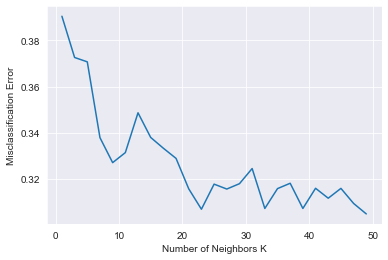

In [20]:
neighbors = list(range(1, 50, 2))
cv_scores = []

for k in neighbors:
    knn_t = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_t, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]

optimal_k = neighbors[mse.index(min(mse))]
print('The optimal number of neighbors is {}'.format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [51]:
knn = KNeighborsClassifier(n_neighbors=49)

knn.fit(X_train, y_train)
print('k-NN Classifier:')
print('Accuracy:', knn.score(X_test, y_test))
print('Precision:', precision_score(y_test, knn.predict(X_test)))
print('Recall:', recall_score(y_test, knn.predict(X_test)))
print('F-1 score:', f1_score(y_test, knn.predict(X_test)))

k-NN Classifier:
Accuracy: 0.7192982456140351
Precision: 0.7333333333333333
Recall: 0.9506172839506173
F-1 score: 0.8279569892473119


In [52]:
cross_val_score(KNeighborsClassifier(n_neighbors=49), x, y, cv=10, scoring='accuracy').mean()

0.7016809264540662

In [23]:
knn.predict([[15,0,10.7,1.7,177,109,18,7.1,2.6,0.9]])

array([1], dtype=int64)

#### SVC

In [24]:
svm = SVC(gamma='auto', probability=True)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7105263157894737
Precision: 0.7105263157894737
Recall: 1.0
F-1 score: 0.8307692307692308


In [25]:
cross_val_score(svm, x, y, cv=10).mean()

0.7123325555267479

In [55]:
svc_ = SVC()

hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'gamma' : [0.001, 0.01, 0.1, 1]}

gssvc = GridSearchCV(svc_, hyperparameters, cv=5, n_jobs=-1, verbose=2)

best_gssvc = gssvc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [56]:
best_gssvc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svm.fit(X_train, y_train)
print('SVC:')
print('Accuracy:', svm.score(X_test, y_test))
print('Precision:', precision_score(y_test, svm.predict(X_test)))
print('Recall:', recall_score(y_test, svm.predict(X_test)))
print('F-1 score:', f1_score(y_test, svm.predict(X_test)))

SVC:
Accuracy: 0.7280701754385965
Precision: 0.7314814814814815
Recall: 0.9753086419753086
F-1 score: 0.835978835978836


In [58]:
cross_val_score(svm, x, y, cv=10).mean()

0.7140880217785844

#### xgboost

In [31]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
predictions = [round(value) for value in pred]
print('XGB')
print('Accuracy:', xgb.score(X_test, y_test))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))
print('F-1 score:', f1_score(y_test, predictions))

XGB
Accuracy: 0.6929824561403509
Precision: 0.7738095238095238
Recall: 0.8024691358024691
F-1 score: 0.787878787878788


In [32]:
cross_val_score(xgb, x, y, cv=10).mean()

0.6666148128943047

In [34]:
param = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
#     'gamma':[i/10.0 for i in range(0,5)],
#     'subsample':[i/10.0 for i in range(6,10)],
#     'colsample_bytree':[i/10.0 for i in range(6,10)],
#     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gsxgb = GridSearchCV(estimator=XGBClassifier(),
                     param_grid=param,
                     scoring=scoring, iid=False,
                     cv=5, verbose=True,
                     refit='Accuracy',
                     n_jobs=-1)

gsxgb.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],


In [36]:
gsxgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)
print('XGB')
print('Accuracy=', xgb.score(X_test, y_test))
print('Precision=', precision_score(y_test, xgb.predict(X_test)))
print('Recall=', recall_score(y_test, xgb.predict(X_test)))
print('F-1 score=', f1_score(y_test, xgb.predict(X_test)))

XGB
Accuracy= 0.7017543859649122
Precision= 0.7701149425287356
Recall= 0.8271604938271605
F-1 score= 0.7976190476190476


In [38]:
cross_val_score(xgb, x, y, cv=10).mean()

0.684072249589491

#### comparing model (after hyperparam tuning)

In [59]:
a = [['logistic regression',model_lr.score(X_test, y_test),precision_score(y_test, model_lr.predict(X_test)), recall_score(y_test, model_lr.predict(X_test)),f1_score(y_test, model_lr.predict(X_test)), cross_val_score(model_lr, x, y, cv=10).mean()],
     ['rfc', rfc.score(X_test, y_test),precision_score(y_test, rfc.predict(X_test)),recall_score(y_test, rfc.predict(X_test)),f1_score(y_test, rfc.predict(X_test)), cross_val_score(rfc, x, y, cv=10).mean()],
     ['knn', knn.score(X_test, y_test), precision_score(y_test, knn.predict(X_test)),recall_score(y_test, knn.predict(X_test)), f1_score(y_test, knn.predict(X_test)), cross_val_score(knn, x, y, cv=10).mean()],
     ['svc', svm.score(X_test, y_test), precision_score(y_test, svm.predict(X_test)),recall_score(y_test, svm.predict(X_test)), f1_score(y_test, svm.predict(X_test)), cross_val_score(svm, x, y, cv=10).mean()],
     ['xgb', xgb.score(X_test, y_test), precision_score(y_test, xgb.predict(X_test)),recall_score(y_test, xgb.predict(X_test)), f1_score(y_test, xgb.predict(X_test)), cross_val_score(xgb, x, y, cv=10).mean()],
    ]

dfcompare = pd.DataFrame(a, columns=['model', 'Accuracy','Precision','Recall','F-1 score','Cross Val Score'])
dfcompare


,model,Accuracy,Precision,Recall,F-1 score,Cross Val Score
0,logistic regression,0.728070,0.740385,0.950617,0.832432,0.719322
1,rfc,0.719298,0.747475,0.913580,0.822222,0.686039
2,knn,0.719298,0.733333,0.950617,0.827957,0.701681
3,svc,0.728070,0.731481,0.975309,0.835979,0.714088
4,xgb,0.701754,0.770115,0.827160,0.797619,0.684072


Dari pengujian tersebut saya memutuskan untuk memilih menggunakan SVC.

In [74]:
import pickle

pickle.dump(svm, open('model_ilp', 'wb'))

In [75]:
loadModel = pickle.load(open('model_ilp', 'rb'))

In [76]:
loadModel

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
loadModel.predict([[38,0,1.5,0.4,298,60,103,6.0,3.0,1.0]])

array([1], dtype=int64)

In [65]:
loadModel.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)